In [1]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import spacy
import nltk
import numpy as np
import matplotlib.pyplot as plt



# tokenizadores
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TweetTokenizer

# diccionarios especiales para puntuación y palabras vacias
nltk.download('punkt') # Manejo de puntuación
nltk.download('stopwords')

# wordnet
nltk.download('wordnet')

from nltk.corpus import stopwords

# lematizador basado en WordNet de nltk
from nltk.stem import WordNetLemmatizer

# steemer de nltk. Raiz de las palabras
#from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
url = 'https://raw.githubusercontent.com/CDspana/Especializacion/main/DB_temp/war-news.csv'

In [4]:
df = pd.read_csv(url, encoding='latin-1')
df

,Unnamed: 0,Headlines,Summary,Press,Date,Keyword
0,0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,3,A second Afghanistan: Doubts over Russias w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan
...,...,...,...,...,...,...
5649,216,"We first cut rations in half. Now, we'll take ...","We first cut rations in half. Now, we'll take ...",USA Today,1 month ago,Yemen
5650,217,Yemen war: Two foreign Doctors Without Borders...,The conflict began in 2014 after Houthi rebels...,Middle East Eye,6 Mar 2022,Yemen
5651,218,"Devastated by war, Yemen's still surviving oil...",Yemen's oil and gas industry could be at a cro...,S&P Global,12 Aug 2021,Yemen
5652,219,Deconstructed: Gas Price Politics And Genocide...,Since we last covered the war in Yemen on this...,The Intercept,11 Feb 2022,Yemen


In [5]:
df.isnull().sum()

Unnamed: 0    20
Headlines      1
Summary        1
Press          1
Date           1
Keyword        1
dtype: int64

In [6]:
df.dropna(inplace= True)

Se genera funcion para realizar la tokenizacion,stopwords,lematización y limpieza de datoz.

In [7]:
from nltk.corpus.reader import norm
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
import re


# Configuración de stopwords en inglés
stopWordsInglés = stopwords.words('english')

# Crear un objeto lematizador de WordNet
lemmatizer = WordNetLemmatizer()


spaces = re.compile(r"\s{2,}")
nums = re.compile(r"[0-9]")
temp = re.compile(r"-")

def preprocess(summary):

    # Se utiliza unicode para eliminar caracteres especiales y acentos
    norm_text = unidecode(str(summary))


    # Eliminamos espacios duplicados
    spaces_text = re.sub(spaces, " ", norm_text)

    # Eliminamos numeros
    numss = re.sub(nums, "", spaces_text)

    guion = re.sub(temp, " ", numss)

    # Tokenización por palabras
    tokens = word_tokenize(guion)



    # Eliminar palabras con menos de 5 caracteres y palabras vacías en inglés
    tokens = [token for token in tokens if len(token) >= 3 and token not in stopWordsInglés]

    # Vuelve las palabras en minuscula

    minuscula = [token.lower() for token in tokens]



    # Lematización de los tokens que son verbos (pos='v')
    #preprocesamiento = [lemmatizer.lemmatize(token, pos='v') for token in minuscula]

    # Unir los tokens lematizados en una sola cadena
    processed_summary = ' '.join([token for token in minuscula])


    return processed_summary


# crea una función vectorizada para que actué sobre múltiples textos
normalize_corpus = np.vectorize(preprocess)
#normalize_corpus

# Aplicar la función 'tokenize_and_lemmatize' a la columna 'Summary' de todo el DataFrame
df['preprocesamiento'] = df['Summary'].apply(preprocess)

# Imprimir el DataFrame resultante con los tokens lematizados
display(df[['Summary', 'preprocesamiento']])

,Summary,preprocesamiento
0,A WAR hero traumatised by the horrors of comba...,war hero traumatised horrors combat working ho...
1,Islamic State is seeking to overthrow the Tali...,islamic state seeking overthrow talibanquietly...
2,"In firsthand accounts, Afghan civilians and U....",firsthand accounts afghan civilians u.s. marin...
3,Russia's lack of progress in its war against U...,russia lack progress war ukraine noted analyst...
4,Lt Gen Sami Sadat tells the BBC of planned ope...,gen sami sadat tells bbc planned operations ma...
...,...,...
5648,U.S. President Joe Biden has made ending Yemen...,u.s. president joe biden made ending yemen civ...
5649,"We first cut rations in half. Now, we'll take ...",first cut rations half now 'll take food hungr...
5650,The conflict began in 2014 after Houthi rebels...,the conflict began houthi rebels seized capita...
5651,Yemen's oil and gas industry could be at a cro...,yemen oil gas industry could crossroads six ye...


In [8]:
df.isnull().sum()

Unnamed: 0          0
Headlines           0
Summary             0
Press               0
Date                0
Keyword             0
preprocesamiento    0
dtype: int64

In [9]:
df.dropna(inplace= True, axis = 0)

### Se trasforma la columna preprocesamiento en una lista

In [10]:
corpus_prep = df.preprocesamiento.to_list()

In [11]:
norm_corpus = normalize_corpus(df.Summary.to_list())
print('corpus original: \n', df.Summary.to_list())
print('\n corpus preprocesado: \n', norm_corpus)
print('\n Vista completa de la lista')
norm_corpus

corpus original: 
 ['A WAR hero traumatised by the horrors of combat is now working as a \n£120-an-hour escort.Grace Parker, 35, served in Iraq and Afghanistan but...', 'Islamic State is seeking to overthrow the Taliban\x97quietly helped along by \nthe discontent in its own ranks, economic crisis, and disputes...', "In firsthand accounts, Afghan civilians and U.S. Marines describe the \ndesperate struggle to flee through the Kabul airport's last open...", "Russia's lack of progress in its war against Ukraine has been noted by \nanalysts since it launched a second phase.", 'Lt Gen Sami Sadat tells the BBC of planned operations but many Afghans are \nweary of more conflict.', "As Russian President Vladimir Putin's invasion of Ukraine has progressed, \nit is clear that almost nothing has gone according to plan.", "Today, with U.S. forces no longer carrying Afghanistan on their shoulders, \nthe responsibility is now thrusted onto Kabul's own neighbors,...", 'While the world focuses on Ukra

array(['war hero traumatised horrors combat working hour escort.grace parker served iraq afghanistan ...',
       'islamic state seeking overthrow talibanquietly helped along discontent ranks economic crisis disputes ...',
       'firsthand accounts afghan civilians u.s. marines describe desperate struggle flee kabul airport last open ...',
       ...,
       'the conflict began houthi rebels seized capital sanaa continued advancing saudi led military coalition intervened ...',
       'yemen oil gas industry could crossroads six years brutal civil war attempting broker peace deal ...',
       'since last covered war yemen podcast year ago biden promised end support saudi arabia uae ...'],
      dtype='<U149')

In [12]:
norm_corpus = filter(None, normalize_corpus(norm_corpus))
# conserva sentencias con 3 o más palabras
norm_corpus = [tok_sent for tok_sent in norm_corpus if len(tok_sent.split()) > 2]

# Word2Vec

### Se importa las librerias para aplicar el modelo de Word2Vec con el enfoque de Skip-gram

In [13]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import pydot

In [14]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_corpus)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id)
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_corpus]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


Vocabulary Size: 11736
Vocabulary Sample: [('war', 1), ('ukraine', 2), ('russia', 3), ('conflict', 4), ('military', 5), ('civil', 6), ('israel', 7), ('president', 8), ('iraq', 9), ('india', 10)]


In [15]:
len(norm_corpus)

5631

Esta función convierte una secuencia de índices de palabras (una lista de números enteros) en tuplas de palabras con el siguiente formato:

(término, término en la misma ventana), con etiqueta 1 (muestras positivas).
(término, término aleatorio del vocabulario), con etiqueta 0 (muestras negativas).

In [16]:
from tensorflow.keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0],
          id2word[pairs[i][1]], pairs[i][1],
          labels[i]))

(afghanistan (25), hanan (8872)) -> 0
(iraq (9), served (192)) -> 1
(working (816), grace (4061)) -> 1
(working (816), iraq (9)) -> 1
(working (816), escort (4060)) -> 1
(grace (4061), traumatised (4059)) -> 1
(traumatised (4059), hour (2149)) -> 1
(grace (4061), hero (1645)) -> 1
(escort (4060), war (1)) -> 1
(grace (4061), war (1)) -> 1


# Implemetacion de la Arquitectura neuronal del modelo skip-gram

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 context (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 100)               1173600   ['inputs[0][0]']              
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               1173600   ['context[0][0]']             
                                                                                              

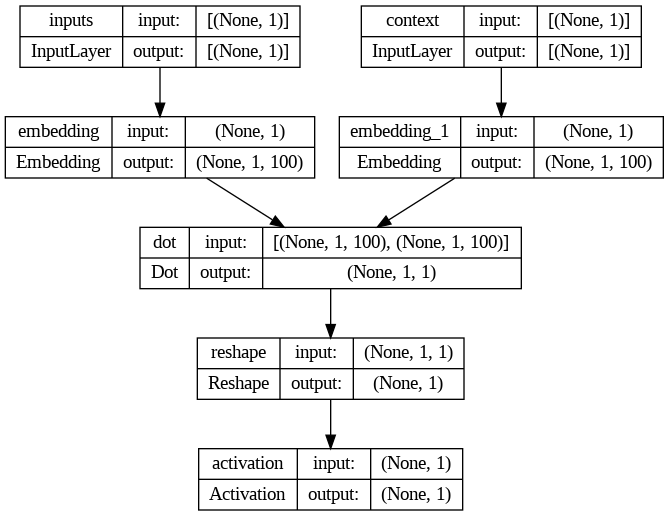

In [17]:
from tensorflow.keras.layers import Dot
from tensorflow.keras.layers import Dense, Reshape, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import plot_model

# inputs
w_inputs = Input(shape=(1, ), dtype='int32', name='inputs')
w = Embedding(vocab_size, embed_size)(w_inputs)

# context
c_inputs = Input(shape=(1, ), dtype='int32', name='context')
c  = Embedding(vocab_size, embed_size)(c_inputs)

# producto escalar
o = Dot(axes=2)([w, c])
o = Reshape((1,), input_shape=(1, 1))(o)
o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=o)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

plot_model(SkipGram, to_file='model_skip_gram.png', show_shapes=True)

Comprender el modelo de aprendizaje profundo anterior es bastante sencillo. Sin embargo, intentaremos resumir los conceptos centrales de este modelo de manera simple para facilitar la comprensión.

En cada ejemplo de entrenamiento, tenemos un par de palabras de entrada que consta de una palabra objetivo con un identificador numérico único y una palabra de contexto con otro identificador numérico único.

Si es una muestra positiva, la palabra tiene un significado contextual y actúa como una palabra de contexto, y nuestra etiqueta Y es 1. Por otro lado, si es una muestra negativa, la palabra no tiene un significado contextual, es simplemente una palabra aleatoria y nuestra etiqueta Y es 0.

Ambas palabras se introducen en una capa de incrustación propia, que tiene un tamaño (tamaño_vocabulario x tamaño_incrustación) proporcionando incrustaciones densas de palabras para cada una de estas dos palabras (1 x tamaño_incrustación para cada palabra).

Después, utilizamos una capa Dot para calcular el producto escalar de estas dos incrustaciones y obtener el valor del producto escalar.

Este valor se envía a una capa densa con activación sigmoide, generando un valor entre 0 y 1. Comparando este valor con la etiqueta real Y (1 o 0), calculamos la pérdida, retro-propagamos los errores para ajustar los pesos (en la capa de incrustación) y repetimos este proceso para todos los pares (objetivo, contexto) a lo largo de múltiples épocas.

# Entrenamiento del modelo de skip-gram

In [18]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += SkipGram.train_on_batch(X,Y)

    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 3118.9687226712704
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 2623.431536093354
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 2516.7117725908756
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 2381.425778657198
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 2210.833257496357


# Extracción de la capa de embeddings

In [19]:
import pandas as pd

# Obtén los embeddings para todas las palabras en tu vocabulario
word_embeddings = SkipGram.get_layer('embedding').get_weights()[0]

# Crea un DataFrame con las palabras y sus embeddings
#word_list = list(word_index.keys())  # Asegúrate de tener una lista de palabras ordenadas
embedding_df = pd.DataFrame(word_embeddings, index=id2word.values())

# Guarda el DataFrame en un archivo si lo deseas
embedding_df.to_csv('word_embeddings.csv')



# visualización de los embeddings para la palabra 'intetional'

In [20]:
# Ahora puedes acceder a los embeddings de una palabra específica, por ejemplo, 'apple'
embedding_of_apple = embedding_df.loc['intentional']
print("Embedding de 'intentional':", embedding_of_apple)


Embedding de 'intentional': 0     0.028072
1    -0.020557
2     0.032951
3    -0.039037
4    -0.012657
        ...   
95    0.014483
96    0.007618
97   -0.026123
98    0.039654
99    0.029175
Name: intentional, Length: 100, dtype: float32


Visualización del diccionario

In [22]:
id2word.values()

dict_values(['war', 'ukraine', 'russia', 'conflict', 'military', 'civil', 'israel', 'president', 'iraq', 'india', 'vietnam', 'iran', 'china', 'u', 'years', 'pakistan', 'russian', 's', 'said', 'lebanon', 'since', 'government', 'syria', 'france', 'afghanistan', 'libya', 'sudan', 'israeli', 'world', 'country', 'yemen', 'south', 'french', 'nigeria', 'two', 'new', 'year', 'venezuela', 'forces', 'army', 'minister', 'one', 'united', 'invasion', 'cuba', 'crisis', 'putin', 'people', 'end', 'first', 'algeria', 'may', 'day', 'palestinian', 'states', 'also', 'says', 'reuters', 'syrian', 'cold', 'state', 'independence', 'foreign', 'crimes', 'led', 'could', 'killed', 'last', 'ukrainian', 'would', 'troops', 'algerian', 'political', 'wars', 'indian', 'many', 'iranian', 'biden', 'chinese', 'long', 'national', 'cuban', 'economic', 'american', 'moscow', 'oil', 'nuclear', 'libyan', 'nigerian', 'began', 'support', 'fighting', 'countries', 'former', 'prime', 'march', "n't", 'soldiers', 'security', 'veterans

## Conociendo la similitud de las palabras 'meltdown', 'intensity', 'someone', 'edition', 'periodically', 'verdict', 'contributor', 'opposing'

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcula la similitud coseno en lugar de la distancia euclidiana
similarity_matrix = cosine_similarity(word_embeddings)

similar_words = {search_term: [id2word[idx] for idx in similarity_matrix[word2id[search_term]-1].argsort()[::-1][1:6]+1]
                   for search_term in ['meltdown', 'intensity', 'someone', 'edition', 'periodically', 'verdict', 'contributor', 'opposing']}

similar_words


{'meltdown': ['exploited', 'setup', 'trodden', 'coastal', 'abidjan'],
 'intensity': ['militant', 'raids', 'luis', 'zealand', 'nitzan'],
 'someone': ['battalions', 'lydd', 'myths', 'refutes', 'fashoda'],
 'edition': ['nation', 'asking', 'geniuses', 'fort', 'destroyed'],
 'periodically': ['concurrent',
  'disable',
  'staging',
  'establishments',
  'warnings'],
 'verdict': ['sweden', 'transnistria', 'partly', 'biden', 'khamenei'],
 'contributor': ['apprised',
  'simultaneous',
  'inconclusive',
  'presumably',
  'blocs'],
 'opposing': ['herrero', 'trodden', 'drifting', 'kaboom', 'feras']}

# Se utiliza la técnica de reducción de dimensionalidad t-Distributed Stochastic Neighbor Embedding (t-SNE) para visualizar las palabras en un espacio bidimensional.

Total words: 48 	Word Embedding shapes: (48, 100)


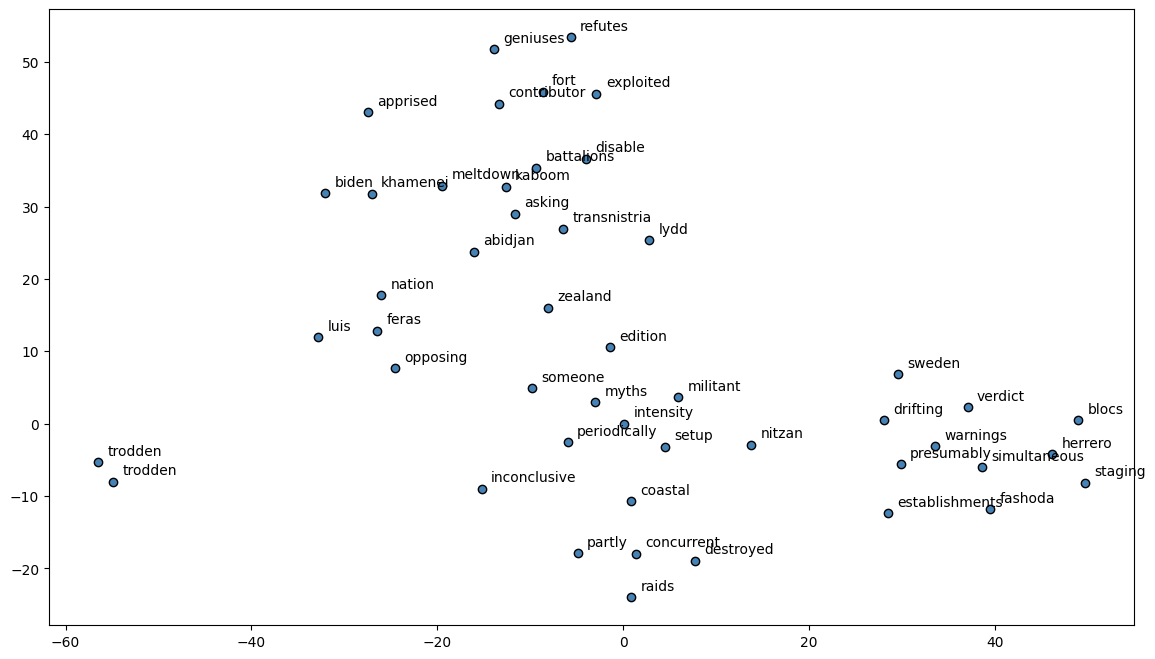

In [24]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([word_embeddings[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

#Gensim word2vec

### Con gensim tambien ofrese la posibilidad de crear embeddings sin la necesidad de implementar y entrenar el modelo desde cero utilizando tensorflow

In [27]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 10          # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size =feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample, epochs=20)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['meltdown', 'intensity', 'someone', 'edition', 'periodically', 'verdict', 'contributor', 'opposing']}
similar_words

{'meltdown': ['represent', 'shocks', 'extreme', 'pattern', 'centred'],
 'intensity': ['launch', 'leave', 'channel', 'improved', 'prospects'],
 'someone': ['sidelined', 'mar', 'project', 'rubble', 'irgc'],
 'edition': ['story', 'benefits', 'real', 'book', 'tyson'],
 'periodically': ['dome', 'unmanned', 'peers', 'targets', 'concert'],
 'verdict': ['ordered', 'vowed', 'accused', 'repeatedly', 'defending'],
 'contributor': ['mal', 'lagu', 'karin', 'tadamon', 'uns'],
 'opposing': ['vienna', 'poised', 'revision', 'restart', 'emphasized']}

### Visualizacion de embeddings utilizando gensim


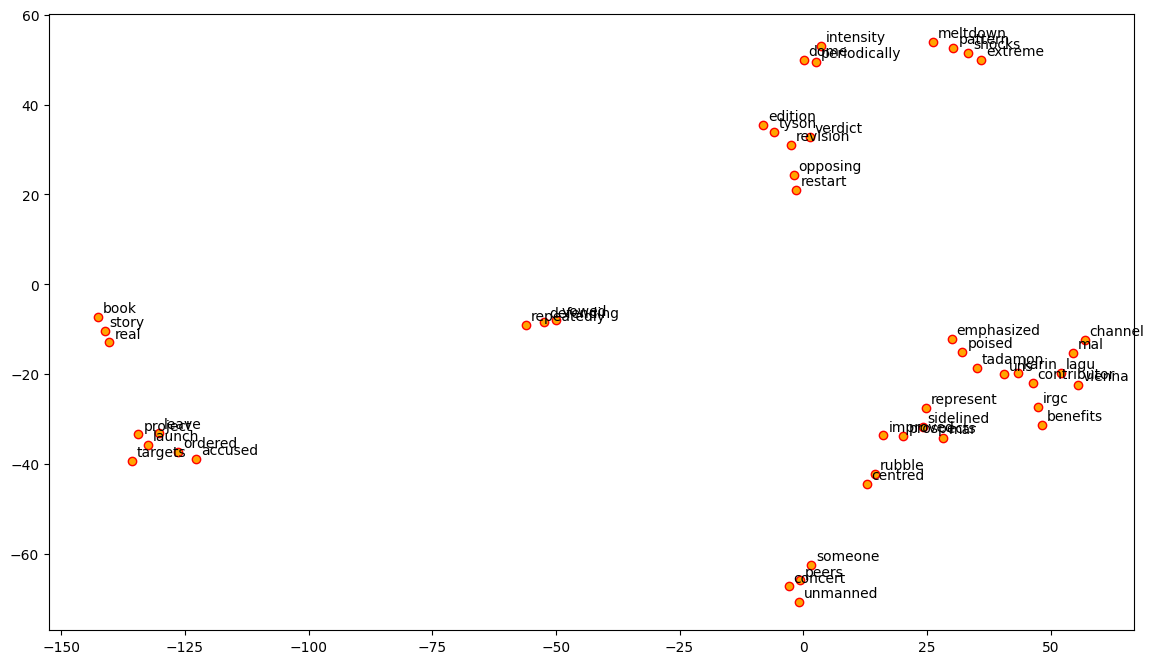

In [28]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Conclusiones:

* Se a logrado implementar y entrenar un modelo desde cero por medio de tensorflow capaz de generar embeddings de palabras.

* los embeddings obtenidos con  la biblioteca gensim presenta una mayor similitud semantica con respecto a los embeddings entrenados desde cero utilizando tensorflow, esto se debe a que gensim ya posee un preentrenamiento sobre corpus de datos mas grandes.

